In [11]:
# Read wide table from one drive
widecsv=read.csv("ED fig.18.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%25 >= 1 & i%%25 < 12){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%25 >= 12 | i%%25 == 0){
    tallcsv[i,3] <- "Two"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"ED fig.18_tall.csv", row.names = FALSE)



       VALUE      Treatment Trial
1   3.793800  X01.DMSO_fliC   One
2   4.136223  X01.DMSO_fliC   One
3   3.939928  X01.DMSO_fliC   One
4   3.793800  X01.DMSO_fliC   One
5         NA  X01.DMSO_fliC   One
6   3.872982  X01.DMSO_fliC   One
7   4.270922  X01.DMSO_fliC   One
8   4.049073  X01.DMSO_fliC   One
9   4.240958  X01.DMSO_fliC   One
10        NA  X01.DMSO_fliC   One
11        NA  X01.DMSO_fliC   One
12  3.094830  X01.DMSO_fliC   Two
13  3.395860  X01.DMSO_fliC   Two
14  3.571952  X01.DMSO_fliC   Two
15  3.094830  X01.DMSO_fliC   Two
16        NA  X01.DMSO_fliC   Two
17        NA  X01.DMSO_fliC   Two
18        NA  X01.DMSO_fliC   Two
19        NA  X01.DMSO_fliC   Two
20        NA  X01.DMSO_fliC   Two
21        NA  X01.DMSO_fliC   Two
22        NA  X01.DMSO_fliC   Two
23        NA  X01.DMSO_fliC   Two
24        NA  X01.DMSO_fliC   Two
25        NA  X01.DMSO_fliC   Two
26  3.997920 X02.Maya1_fliC   One
27  4.136223 X02.Maya1_fliC   One
28  4.136223 X02.Maya1_fliC   One
29  4.136223 X

In [12]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [13]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("ED fig.18_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))

      Treatment    VALUE Trial
1 X01.DMSO_fliC 3.793800   One
2 X01.DMSO_fliC 4.136223   One
3 X01.DMSO_fliC 3.939928   One
4 X01.DMSO_fliC 3.793800   One
5 X01.DMSO_fliC 3.872982   One
6 X01.DMSO_fliC 4.270922   One


[1]  9 12

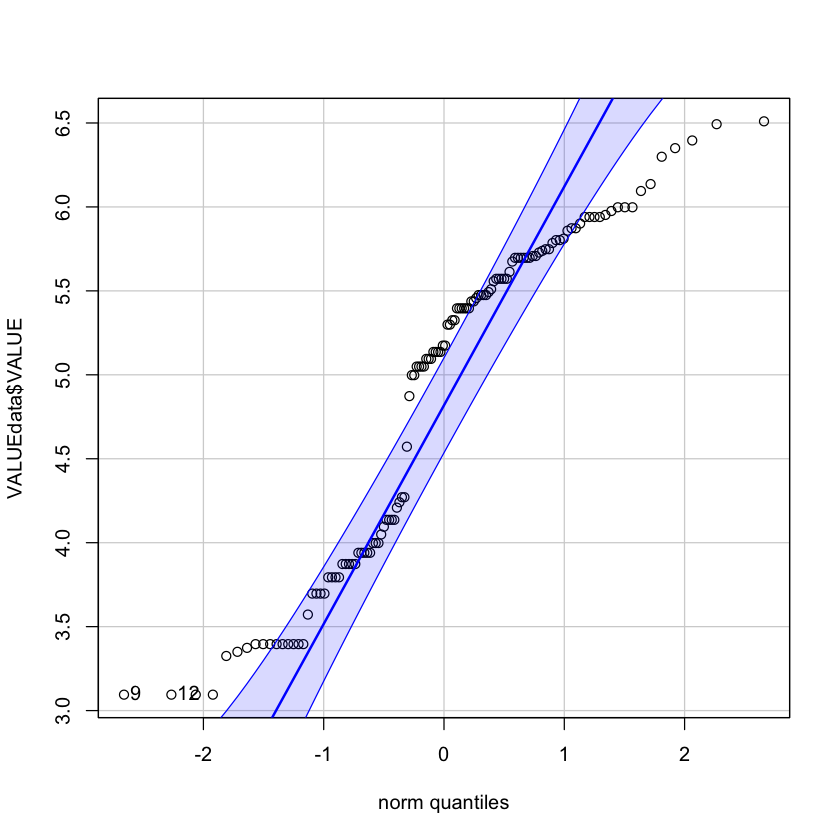

In [14]:
#Normal distribution
qqp(VALUEdata$VALUE, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


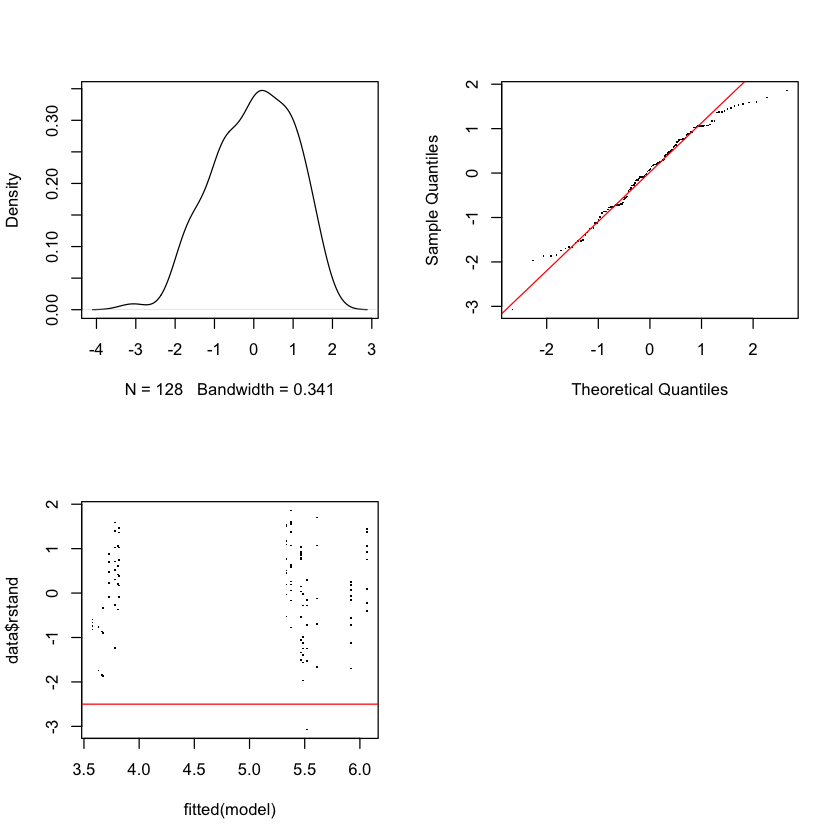

In [15]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUE.lmm<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUE ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUE.lmm)

In [16]:
#If the above looks good, then we can get the model characteristics
summary(VALUE.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUE ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
    86.8    115.3    -33.4     66.8      118 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06622 -0.72542  0.07808  0.76749  1.85517 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.006525 0.08078 
 Residual             0.096130 0.31005 
Number of obs: 128, groups:  Trial, 2

Fixed effects:
                          Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               3.746986   0.106514  14.697769  35.178 1.34e-15 ***
TreatmentX02.Maya1_fliC  -0.009702   0.126577 125.945815  -0.077    0.939    
TreatmentX03.Maya2_fliC  -0.095428   0.126577 125.945815  -0.754    0.452    
TreatmentX04.flg22_fliC  -0.041220   0.126577 125.945815  -0.326    0.745    
TreatmentX05.DMSO_fliC    2.246185   0.114022 126.74

In [17]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result, alpha=0.1)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF          F value     
 Min.   :105.4   Min.   :15.06   Min.   :7   Min.   :126.3   Min.   :156.7  
 1st Qu.:105.4   1st Qu.:15.06   1st Qu.:7   1st Qu.:126.3   1st Qu.:156.7  
 Median :105.4   Median :15.06   Median :7   Median :126.3   Median :156.7  
 Mean   :105.4   Mean   :15.06   Mean   :7   Mean   :126.3   Mean   :156.7  
 3rd Qu.:105.4   3rd Qu.:15.06   3rd Qu.:7   3rd Qu.:126.3   3rd Qu.:156.7  
 Max.   :105.4   Max.   :15.06   Max.   :7   Max.   :126.3   Max.   :156.7  
     Pr(>F)         
 Min.   :4.108e-59  
 1st Qu.:4.108e-59  
 Median :4.108e-59  
 Mean   :4.108e-59  
 3rd Qu.:4.108e-59  
 Max.   :4.108e-59  
 X01.DMSO_fliC X02.Maya1_fliC X03.Maya2_fliC X04.flg22_fliC  X05.DMSO_fliC 
           "a"            "a"            "a"            "a"            "b" 
X06.Maya1_fliC X07.Maya2_fliC X08.flg22_fliC 
           "c"            "c"            "c" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparis